# Checkpoint Two: Exploratory Data Analysis

Now that your chosen dataset is approved, it is time to start working on your analysis. Use this notebook to perform your EDA and make notes where directed to as you work.

## Getting Started

Since we have not provided your dataset for you, you will need to load the necessary files in this repository. Make sure to include a link back to the original dataset here as well.

My dataset: https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand

Your first task in EDA is to import necessary libraries and create a dataframe(s). Make note in the form of code comments of what your thought process is as you work on this setup task.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the hotel bookings data
file_path = "hotel_bookings.csv"

# Create the df
df = pd.read_csv(file_path)

## Get to Know the Numbers

Now that you have everything setup, put any code that you use to get to know the dataframe and its rows and columns better in the cell below. You can use whatever techniques you like, except for visualizations. You will put those in a separate section.

When working on your code, make sure to leave comments so that your mentors can understand your thought process.

In [23]:
# Display the first few rows and the data types of the dataframe
head = df.head().to_string() # to_string for ease of viewing
types = df.dtypes
print("HEAD CALL BELOW", "\n", head, "\n") # general view of the data
print("DATA TYPES BELOW","\n", types, "\n") # general view of the data types

# Checking for nulls
missing_values = df.isnull().sum() # gives me an idea of what columns need adjustments during data cleaning phase

# descriptive statistics for relevant columns
adr_stats = df['adr'].describe() # general statistics
lead_time_stats = df['lead_time'].describe() # genera statistics
booking_channel_stats = df['distribution_channel'].value_counts() # this provides counts to show impact of each distribution channel

print("MISSING VALUES BELOW", "\n", missing_values, "\n")
print("ADR STATS BELOW", "\n", adr_stats, "\n")
print("LEAD TIME STATS BELOW", "\n", lead_time_stats, "\n")
print("BOOKING CHANNEL COUNTS BELOW", "\n", booking_channel_stats, "\n")

HEAD CALL BELOW 
           hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  stays_in_weekend_nights  stays_in_week_nights  adults  children  babies meal country market_segment distribution_channel  is_repeated_guest  previous_cancellations  previous_bookings_not_canceled reserved_room_type assigned_room_type  booking_changes deposit_type  agent  company  days_in_waiting_list customer_type   adr  required_car_parking_spaces  total_of_special_requests reservation_status reservation_status_date
0  Resort Hotel            0        342               2015               July                        27                          1                        0                     0       2       0.0       0   BB     PRT         Direct               Direct                  0                       0                               0                  C                  C                3   No Deposit    NaN      NaN                  

## Visualize

Create any visualizations for your EDA here. Make note in the form of code comments of what your thought process is for your visualizations.

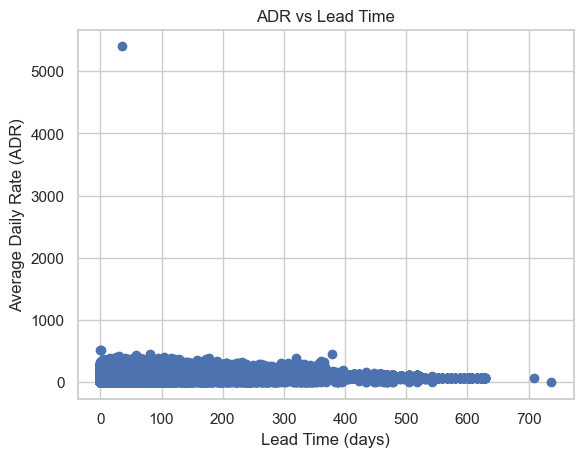

In [ ]:
# How does the ADR change with the different lead times? (lead times just mean how many days between when a guest makes a reservation and their actual check-in date.)
# isolating data for figure
adr = df['adr']
lead_time = df['lead_time']

# plot is self explanatory
plt.scatter(lead_time, adr)
plt.title('ADR vs Lead Time')
plt.xlabel('Lead Time (days)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

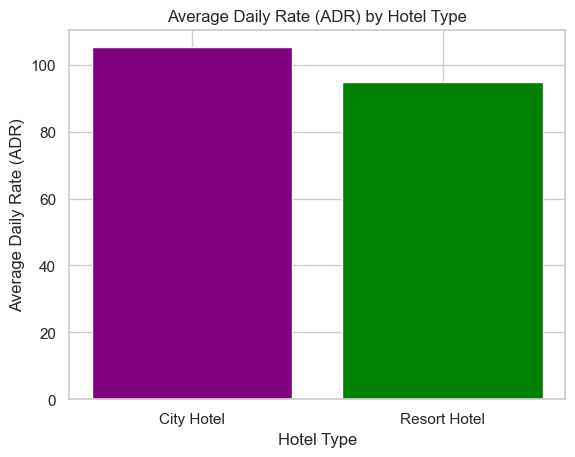

In [36]:
# Group the data by hotel type and calculate the average ADR
avg_adr_by_h = df.groupby('hotel')['adr'].mean().reset_index() # groupby hotel separates the two options. getting the .mean of the two hotels ADRs lets us see which hotel is generally more expensive per day. reset_index() sets the index back to a numerical count.

# each line belwo is self explanatory or I can explain in 
plt.bar(avg_adr_by_h['hotel'], avg_adr_by_h['adr'], color=['purple', 'green'])
plt.title('Average Daily Rate (ADR) by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()

## Summarize Your Results

With your EDA complete, answer the following questions.

1. Was there anything surprising about your dataset? 
2. Do you have any concerns about your dataset? 
3. Is there anything you want to make note of for the next phase of your analysis, which is cleaning data? 

# Answers

#### 1. The hotel didn't directly track check-in/check-out dates. check-in dates can be parsed. check-out dates will need to be calculated based on other information if other information is found to be reliable.

#### 2. Dataset appeared pristine in selection phase but either I am needing further understanding or some of the information is unreliable. (e.g. some ADRs are 0.00 which would indicate the guest did not pay for the stay or the stay was somehow free.)

#### 3. Check-in dates may be able to be factored by working from reservation date and adding days equivalent to lead-time. Check-out dates may be able to be factored by taking check-in date and adding stays in weekdays & weeknights.